# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [22]:
# Yuval 2025
# Shoham 2269

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

In [24]:
# Loading the datasets 
train_df = pd.read_csv('cancer_train.csv')
test_df = pd.read_csv('cancer_test.csv')

# Displaying the first 5 rows of each dataset
display(Markdown("### Train set - first 5 rows:\n"))
print(train_df.head())

display(Markdown("### Test set - first 5 rows:\n"))
print(test_df.head())

# Generating statistics to get a basic understanding of the data
display(Markdown("### Descriptive statistics for the train set:\n"))
print(train_df.describe())

display(Markdown("### Descriptive statistics for the test set:\n"))
print(test_df.describe())

### Train set - first 5 rows:


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       13.170         18.66           85.98      534.6          0.11580   
1        9.667         18.49           61.49      289.1          0.08946   
2       20.090         23.86          134.70     1247.0          0.10800   
3        8.950         15.76           58.74      245.2          0.09462   
4       18.030         16.85          117.50      990.0          0.08947   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.12310         0.12260              0.07340         0.2128   
1           0.06258         0.02948              0.01514         0.2238   
2           0.18380         0.22830              0.12800         0.2249   
3           0.12430         0.09263              0.02308         0.1305   
4           0.12320         0.10900              0.06254         0.1720   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

### Test set - first 5 rows:


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       16.170         16.07          106.30      788.5          0.09880   
1       14.580         13.66           94.29      658.8          0.09832   
2       18.820         21.97          123.70     1110.0          0.10180   
3        8.196         16.84           51.71      201.9          0.08600   
4       12.940         16.17           83.18      507.6          0.09879   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.14380         0.06651             0.053970         0.1990   
1           0.08918         0.08222             0.043490         0.1739   
2           0.13890         0.15940             0.087440         0.1943   
3           0.05943         0.01588             0.005917         0.1769   
4           0.08836         0.03296             0.023900         0.1735   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

### Descriptive statistics for the train set:


       mean radius  mean texture  mean perimeter    mean area  \
count   455.000000    455.000000      455.000000   455.000000   
mean     14.257910     19.482835       92.876220   668.580440   
std       3.613344      4.261633       24.922646   364.587131   
min       6.981000     10.380000       43.790000   143.500000   
25%      11.725000     16.390000       75.265000   422.300000   
50%      13.460000     19.020000       87.160000   559.200000   
75%      16.150000     21.960000      106.850000   807.450000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       455.000000        455.000000      455.000000           455.000000   
mean          0.096224          0.105452        0.090853             0.050013   
std           0.013793          0.053892        0.081118             0.039727   
min           0.052630          0.019380        0.000000             0.000000   
25%      

### Descriptive statistics for the test set:


       mean radius  mean texture  mean perimeter    mean area  \
count   114.000000    114.000000      114.000000   114.000000   
mean     13.605965     18.518596       88.348246   600.243860   
std       3.102470      4.389544       21.349267   291.016495   
min       8.196000      9.710000       51.710000   201.900000   
25%      11.472500     15.472500       74.425000   405.600000   
50%      13.080000     18.060000       84.290000   517.250000   
75%      14.957500     21.127500       96.645000   686.650000   
max      23.290000     30.720000      158.900000  1685.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       114.000000        114.000000      114.000000           114.000000   
mean          0.096905          0.099907        0.080602             0.044554   
std           0.015151          0.048234        0.073645             0.034689   
min           0.068280          0.023440        0.000000             0.000000   
25%      

### Boxplot of Mean Radius in Train Set

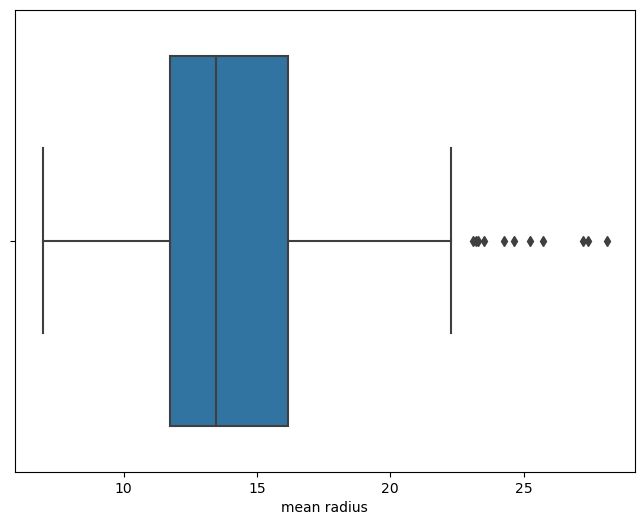

### Countplot of Target in Train Set

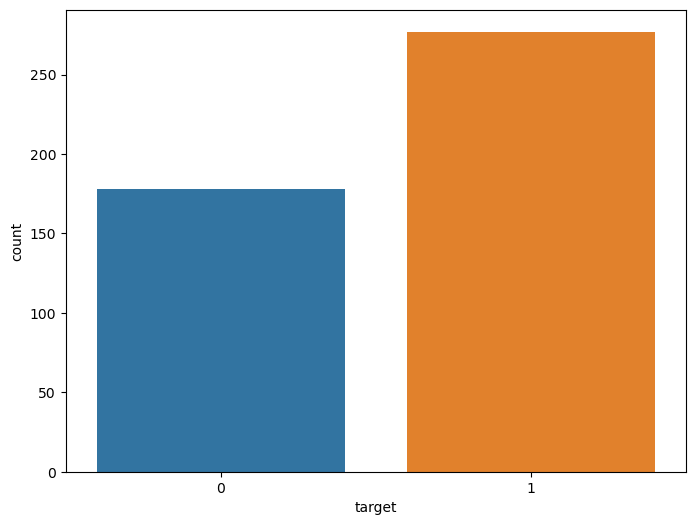

### Histogram of Mean Compactness in Train Set

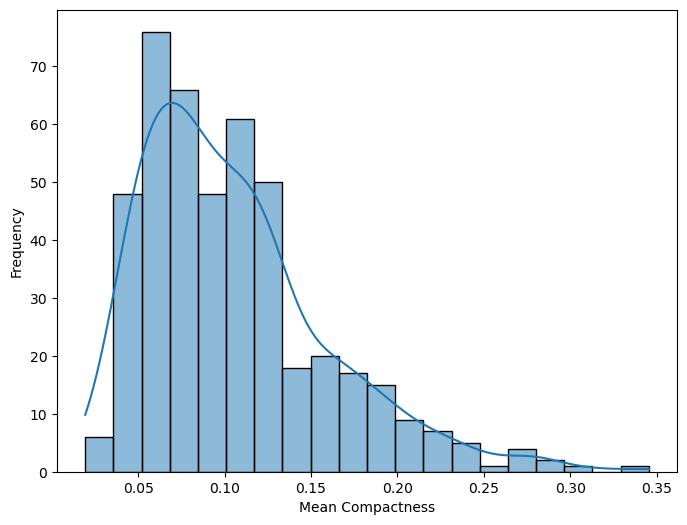

### Scatter Plot of Worst Perimeter vs Worst Area

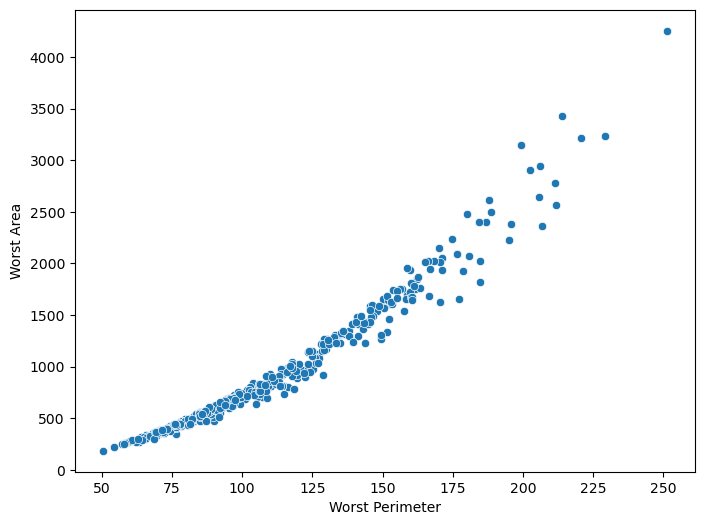

In [25]:
# Data Visualization to further explore the data features and relationships

# Boxplot for 'mean radius' showing the distribution across the samples in the train set

plt.figure(figsize=(8, 6))
sns.boxplot(x='mean radius', data=train_df)
plt.title(display(Markdown("### Boxplot of Mean Radius in Train Set")))
plt.show()

# Countplot showing the distribution of target classes in the train set

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train_df)
plt.title(display(Markdown("### Countplot of Target in Train Set")))
plt.show()

# Histogram of 'mean compactness'
plt.figure(figsize=(8, 6))
sns.histplot(train_df['mean compactness'], kde=True)
plt.title(display(Markdown("### Histogram of Mean Compactness in Train Set")))
plt.xlabel('Mean Compactness')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of 'worst perimeter' vs 'worst area'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='worst perimeter', y='worst area', data=train_df)
plt.title(display(Markdown("### Scatter Plot of Worst Perimeter vs Worst Area")))
plt.xlabel('Worst Perimeter')
plt.ylabel('Worst Area')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [26]:
# Load the training dataset from a CSV file

data = train_df

# Separate the features and the target variable.
X = data.drop('target', axis=1)
y = data['target']

# Definition of Pipelines for Feature Engineering and Model Training

# Define a pipeline for preprocessing and training with Support Vector Machine (SVM).

pipeline_svc = Pipeline([
    ('scaler', StandardScaler()), # Normalize features
    ('features', PolynomialFeatures(degree=2)),   # Create polynomial features for more complex patterns
    ('classifier', SVC()) # SVM classifier
])


# Define a similar pipeline for preprocessing and training with Gaussian Naive Bayes

pipeline_nb = Pipeline([
    ('scaler', StandardScaler()), # Normalize features
    ('features', PolynomialFeatures(degree=2)), # Create polynomial features for more complex patterns
    ('classifier', GaussianNB()) # Naive Bayes classifier
])

# Setting Parameters for Grid Search

# Parameters for grid search to optimize the SVC model.

param_grid_svc = {
    'classifier__C': [0.1, 1, 10],  # Regularization parameter
    'classifier__kernel': ['rbf', 'linear'],   # Types of kernel
    'features__degree': [1, 2]  # Degrees of polynomial features
}


# Parameters for grid search to optimize the Gaussian Naive Bayes model.

param_grid_nb = {
    'classifier__var_smoothing': np.logspace(-9, 0, 10), # Smoothing parameter
    'classifier__priors': [None, [0.7, 0.3], [0.5, 0.5]],  # Prior probabilities of the classes
    'features__degree': [1, 2]   # Degrees of polynomial features
}


# Define a scorer for evaluating the models

# Create a scoring function using the F1 score to evaluate model performance.

scorer = make_scorer(f1_score, average='macro')

# Grid Search with Cross-Validation

# Perform grid search with 5-fold cross-validation using the defined pipelines and parameter grids.

grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, scoring=scorer)
grid_search_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=5, scoring=scorer)


# Fit models
# Fit the grid search to the data.

grid_search_svc.fit(X, y)
grid_search_nb.fit(X, y)

# Output Best Results

# Print the best parameters and the best cross-validation score obtained with the SVC model.

print("Best parameters for SVC:", grid_search_svc.best_params_)
print("Best cross-validation score for SVC:", grid_search_svc.best_score_)

# Print the best parameters and the best cross-validation score obtained with the Gaussian Naive Bayes model.

print("Best parameters for GaussianNB:", grid_search_nb.best_params_)
print("Best cross-validation score for GaussianNB:", grid_search_nb.best_score_)

# Creating DataFrame for Results Comparison
# Create DataFrames to display the results from the grid search for both models.

results_df = pd.DataFrame(grid_search_svc.cv_results_)
results_df_nb = pd.DataFrame(grid_search_nb.cv_results_)

# Print a summary of results.

print("SVC Results:\n", results_df[['param_classifier__C', 'param_classifier__kernel', 'param_features__degree', 'mean_test_score']])
print("GaussianNB Results:\n", results_df_nb[['param_classifier__var_smoothing', 'param_classifier__priors', 'param_features__degree', 'mean_test_score']])


Best parameters for SVC: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'features__degree': 1}
Best cross-validation score for SVC: 0.9767557965739959
Best parameters for GaussianNB: {'classifier__priors': [0.7, 0.3], 'classifier__var_smoothing': 1e-09, 'features__degree': 1}
Best cross-validation score for GaussianNB: 0.9282059591926151
SVC Results:
    param_classifier__C param_classifier__kernel param_features__degree  \
0                  0.1                      rbf                      1   
1                  0.1                      rbf                      2   
2                  0.1                   linear                      1   
3                  0.1                   linear                      2   
4                    1                      rbf                      1   
5                    1                      rbf                      2   
6                    1                   linear                      1   
7                    1                   linea

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [27]:
# Data Loading
# Load the training dataset from a CSV file.

train_data = train_df

# Separate the features and the target variable from the training set.

X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

# Defining the Best Pipeline for SVC
# Define a pipeline for preprocessing and training the best SVC model.

best_pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features using StandardScaler
    ('features', PolynomialFeatures(degree=1)),  # Use polynomial features with degree 1, which means no additional interaction terms
    ('classifier', SVC(C=0.1, kernel='linear'))  # SVC model with the best parameters (C=0.1, linear kernel)
])

# Fitting the Best Pipeline
# Train the pipeline using the full training dataset.

best_pipeline_svc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('features',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('classifier',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

## Part 5 - Apply on test and show model performance estimation

In [28]:
# Loading Test Data
# Load the test dataset. In this case, we're using the training dataset ('train_df') for testing.

test_data = test_df

# Separate the features and the target variable from the test set.

X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

# Predicting on Test Data
# Use the trained model to make predictions on the test data.

predictions = best_pipeline_svc.predict(X_test)

# Displaying the First Five Predictions
# Print the predicted results for the first 5 test samples to see how the model performed.

print("First five predictions:", predictions[:5])

# Calculating and Displaying Model Performance

# Print a full classification report showing precision, recall, and F1 score for each class (benign/malignant).

print(classification_report(y_test, predictions))


First five predictions: [1 1 0 1 1]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.99      0.99      0.99        80

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

